Initial truck load = 27.24 kg
Visited cell (13, 17), collected 0.66 kg, new truck load = 27.90 kg
Visited cell (12, 17), collected 0.55 kg, new truck load = 28.46 kg
Visited cell (11, 17), collected 0.53 kg, new truck load = 28.99 kg
Visited cell (10, 17), collected 0.68 kg, new truck load = 29.66 kg
Visited cell (9, 17), collected 0.96 kg, new truck load = 30.63 kg
Visited cell (8, 17), collected 0.74 kg, new truck load = 31.37 kg
Visited cell (7, 17), collected 0.55 kg, new truck load = 31.92 kg
Visited cell (6, 17), collected 0.94 kg, new truck load = 32.86 kg
Visited cell (5, 17), collected 0.76 kg, new truck load = 33.62 kg
Visited cell (4, 17), collected 0.61 kg, new truck load = 34.23 kg
Visited cell (3, 17), collected 0.57 kg, new truck load = 34.80 kg
Visited cell (2, 17), collected 0.90 kg, new truck load = 35.70 kg
Visited cell (1, 17), collected 0.73 kg, new truck load = 36.42 kg
Visited cell (0, 17), collected 0.79 kg, new truck load = 37.22 kg
Visited cell (0, 16), collec

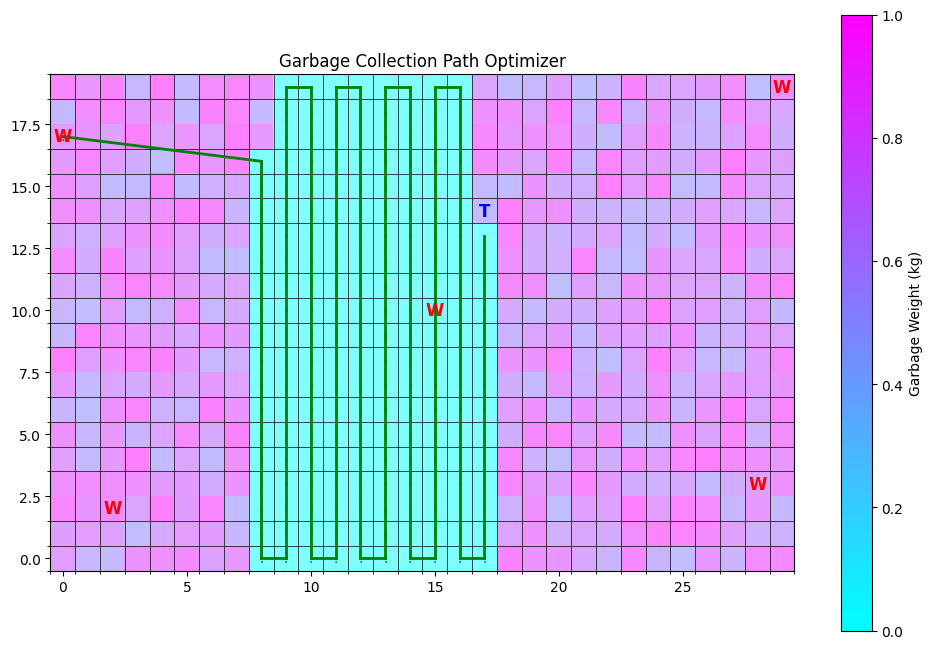

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

def optimal_path(graph, start, waste_centers, garbage_weights, truck_capacity, initial_load, load_threshold=0.85):

    visited = set()  # Track visited cells
    path = []  # Record the path
    load = initial_load  # Initialize truck load
    full_capacity_reached = False  # Track if the truck's full capacity has been reached
    current = start  # Start at the truck's initial position

    log = [f"Initial truck load = {load:.2f} kg"]

    while True:
        # If full capacity reached or load exceeds the threshold, plan a return route
        if full_capacity_reached or load >= truck_capacity * load_threshold:
            full_capacity_reached = True
            log.append(f"Truck load exceeds {load_threshold * 100:.0f}% at cell {current}, planning return route.")
            # Find the nearest waste center
            nearest_center = min(waste_centers, key=lambda wc: abs(current[0] - wc[0]) + abs(current[1] - wc[1]))
            path.append(nearest_center)
            log.append(f"Reached waste center at cell {nearest_center} with truck load = {load:.2f} kg")
            break

        # Find neighbors
        neighbors = [n for n in graph.neighbors(current)]

        # If all neighbors are exhausted, allow revisiting visited cells
        if not neighbors or all(n in visited for n in neighbors):
            log.append("All neighbors exhausted, revisiting visited cells.")
            neighbors = [n for n in graph.neighbors(current)]

        # Sort neighbors by proximity (all garbage must be collected, so no weight prioritization)
        neighbors = sorted(neighbors, key=lambda n: (n in visited, abs(n[0] - current[0]) + abs(n[1] - current[1])))

        # Choose the next cell
        next_cell = neighbors[0]
        path.append(next_cell)
        visited.add(next_cell)

        # Collect garbage if the truck has not reached full capacity
        if not full_capacity_reached:
            garbage = garbage_weights[next_cell[0], next_cell[1]]
            load += garbage
            garbage_weights[next_cell[0], next_cell[1]] = 0  # Zero out garbage in the cell
            log.append(f"Visited cell {next_cell}, collected {garbage:.2f} kg, new truck load = {load:.2f} kg")
            if load >= truck_capacity:
                log.append(f"Truck reached full capacity at cell {next_cell}, load = {load:.2f} kg")
                full_capacity_reached = True

        current = next_cell

    return path, load, log


def visualize_maze_with_path(maze_size, garbage_weights, truck_start, waste_centers, path):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xticks(np.arange(-0.5, maze_size[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, maze_size[0], 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)

    # Show garbage weights with reduced opacity
    ax.imshow(garbage_weights, cmap='cool', interpolation='none', origin='upper', alpha=0.5)

    # Mark waste centers
    for center in waste_centers:
        ax.text(center[1], center[0], "W", color="red", ha="center", va="center", fontsize=12, fontweight="bold")

    # Mark the truck start position
    ax.text(truck_start[1], truck_start[0], "T", color="blue", ha="center", va="center", fontsize=12, fontweight="bold")

    # Plot the path
    x_coords, y_coords = zip(*path)
    path_colors = ['green' if i < len(path) - 1 else 'red' for i in range(len(path))]
    for i in range(len(path) - 1):
        line_color = 'green' if i < len(path) - 1 else 'red'
        ax.plot([y_coords[i], y_coords[i + 1]], [x_coords[i], x_coords[i + 1]], color=line_color, linewidth=2)

    # Highlight path points
    for i, (x, y) in enumerate(path):
        ax.text(y, x, ".", color=path_colors[i], ha="center", va="center", fontsize=10)

    ax.set_xlim(-0.5, maze_size[1] - 0.5)
    ax.set_ylim(-0.5, maze_size[0] - 0.5)
    plt.title("Garbage Collection Path Optimizer")
    plt.colorbar(plt.cm.ScalarMappable(cmap='cool'), ax=ax, label="Garbage Weight (kg)")
    plt.show()


# Parameters
maze_size = (20, 30)  # Grid size (20x30)
garbage_range = (0.5, 1)  # Range of garbage in each home (kg)
truck_capacity = 200  # Full load capacity of the truck (kg)
initial_load_percent = random.uniform(10, 15) / 100  # Initial load as a percentage of capacity
initial_load = initial_load_percent * truck_capacity  # Calculate initial load
waste_center_positions = [(17, 0), (2, 2), (10, 15), (3, 28), (19, 29)]  # Fixed waste center positions

# Generate garbage weights for each cell
garbage_weights = np.random.uniform(garbage_range[0], garbage_range[1], maze_size)

# Initialize the truck's position
truck_start = (random.randint(0, maze_size[0] - 1), random.randint(0, maze_size[1] - 1))

# Create the grid as a graph
graph = nx.grid_2d_graph(maze_size[0], maze_size[1])

# Run the path optimizer
path, final_load, log = optimal_path(graph, truck_start, waste_center_positions, garbage_weights, truck_capacity, initial_load)

# Display the log
for entry in log:
    print(entry)

# Visualize the updated maze and path
visualize_maze_with_path(maze_size, garbage_weights, truck_start, waste_center_positions, path)
